In [1]:
import numpy as np
# %matplotlib
import matplotlib.pyplot as plt
from numpy import sinh, cosh, tanh

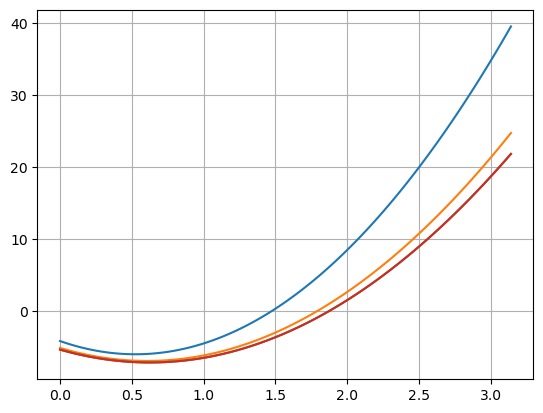

In [2]:
c0 = 0.3
zeta = 1/2.5
a = 0.7
h = 2
R = 7
L = 2
depsilon = 4
k = 0.4e-19
kt = 20e-3
xi = np.sqrt(k/kt)*1e9
rho = R/xi
l = L/xi
K = np.sqrt(k*kt) * 1e-9 / 4.11e-21

def calc_phi(L):
    l = L/xi
    Ein = 1/tanh(rho)-0.5*k/4.11e-21 *zeta**2 *a*c0*(1-c0)*(rho+sinh(rho)*sinh(rho))/(sinh(rho)**2)
    Eout = 1/tanh(l)-0.5*k/4.11e-21 *zeta**2 *a*c0*(1-c0)*(l+sinh(l)*sinh(l))/(sinh(l)**2)
    varphi = h/a * depsilon / (2*Ein + Eout)
    return varphi

def Ftot(L, phi):
    # phi = calc_phi(L)
    l = L/xi
    Ein = K*(1/tanh(rho)-0.5*k/4.11e-21 *zeta**2 *a*c0*(1-c0)*(rho+sinh(rho)*sinh(rho))/(sinh(rho)**2))
    Eout = K*(1/tanh(l)-0.5*k/4.11e-21 *zeta**2 *a*c0*(1-c0)*(l+sinh(l)*sinh(l))/(sinh(l)**2))
    F = (2*Ein+Eout)/(2*Ein+2*Eout)*Eout*phi**2 - (Eout)/(Ein+Eout)*h/a*depsilon*phi \
            - (h/a*depsilon)**2/(2*Ein+2*Eout)
    return F

L = 2
Ftot(L=L, phi=calc_phi(L))

phi = np.linspace(0, np.pi, num=100)
L_lst = [1, 2, 5, 7]
for i in L_lst:
    plt.plot(phi, Ftot(L=i, phi=phi))
plt.grid()
plt.show()

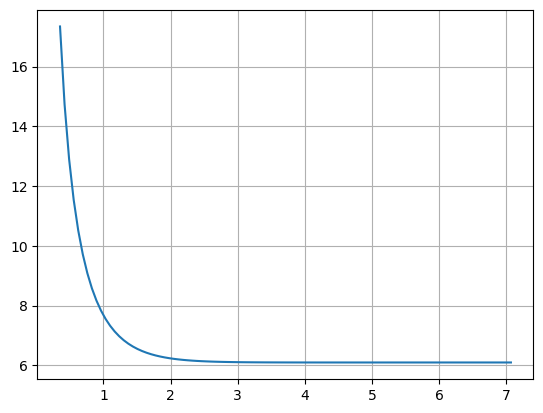

In [3]:
def F(p):
    Ein =  K*(1/tanh(rho)-0.5*k/4.11e-21 *zeta**2 *a*c0*(1-c0)*(rho+sinh(rho)*sinh(rho))/(sinh(rho)**2))
    Eout = K*(1/tanh(l)  -0.5*k/4.11e-21 *zeta**2 *a*c0*(1-c0)*(l  +sinh(l)  *sinh(l))  /(sinh(l  )**2))
    varphi = Eout*p/(Ein + Eout)
    return varphi
p = np.linspace(0, np.pi, num=100)
# plt.plot(p, phi(p))

l = np.linspace(0.5, 10, 100) / xi
Eout = lambda l: K*(1/tanh(l)  -0.5*k/4.11e-21 *zeta**2 *a*c0*(1-c0)*(l  +sinh(l)  *sinh(l))  /(sinh(l  )**2))
plt.plot(l, Eout(l))
plt.grid()
plt.show()

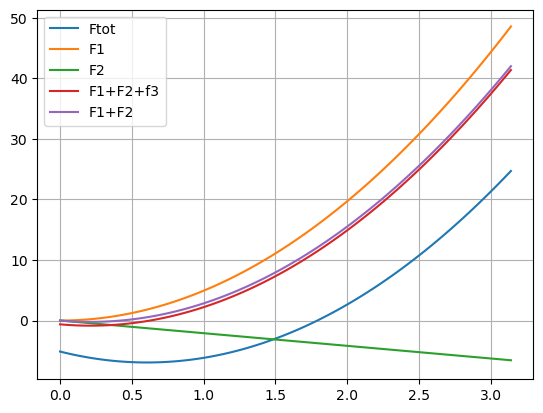

In [4]:
def Ftot(L, phi):
    # phi = calc_phi(L)
    l = L/xi
    Ein = K*(1/tanh(rho)-0.5*k/4.11e-21 *zeta**2 *a*c0*(1-c0)*(rho+sinh(rho)*sinh(rho))/(sinh(rho)**2))
    Eout = K*(1/tanh(l)-0.5*k/4.11e-21 *zeta**2 *a*c0*(1-c0)*(l+sinh(l)*sinh(l))/(sinh(l)**2))
    F = (2*Ein+Eout)/(2*Ein+2*Eout)*Eout*phi**2 - (Eout)/(Ein+Eout)*h/a*depsilon*phi \
            - (h/a*depsilon)**2/(2*Ein+2*Eout)
    return F

def F1(L, phi):
    l = L/xi
    Ein = K*(1/tanh(rho)-0.5*k/4.11e-21 *zeta**2 *a*c0*(1-c0)*(rho+sinh(rho)*sinh(rho))/(sinh(rho)**2))
    Eout = K*(1/tanh(l)-0.5*k/4.11e-21 *zeta**2 *a*c0*(1-c0)*(l+sinh(l)*sinh(l))/(sinh(l)**2))
    F = (2*Ein + Eout)/(2*Ein + 2*Eout) * Eout * phi**2
    return F

def F2(L, phi):
    l = L/xi
    Ein = K*(1/tanh(rho)-0.5*k/4.11e-21 *zeta**2 *a*c0*(1-c0)*(rho+sinh(rho)*sinh(rho))/(sinh(rho)**2))
    Eout = K*(1/tanh(l)-0.5*k/4.11e-21 *zeta**2 *a*c0*(1-c0)*(l+sinh(l)*sinh(l))/(sinh(l)**2))
    F = -Eout/(Ein + Eout) * depsilon * phi 
    return F

L = 2
Ftot(L=L, phi=calc_phi(L))

l = L/xi
Ein = K*(1/tanh(rho)-0.5*k/4.11e-21 *zeta**2 *a*c0*(1-c0)*(rho+sinh(rho)*sinh(rho))/(sinh(rho)**2))
Eout = K*(1/tanh(l)-0.5*k/4.11e-21 *zeta**2 *a*c0*(1-c0)*(l+sinh(l)*sinh(l))/(sinh(l)**2))

phi = np.linspace(0, np.pi, num=100)
L_lst = [1, 2, 5, 7]
plt.plot(phi, Ftot(L=2, phi=phi), label="Ftot")
plt.plot(phi, F1(L=2, phi=phi), label='F1')
plt.plot(phi, F2(L=2, phi=phi), label='F2')

f3 = - depsilon**2 / (2*(Ein + Eout))
plt.plot(phi, F1(L=2, phi=phi)+F2(L=2, phi=phi) + f3 , label='F1+F2+f3')
plt.plot(phi, F1(L=2, phi=phi)+F2(L=2, phi=phi) , label='F1+F2')
plt.grid(); plt.legend()
plt.show()

In [59]:
from sympy import symbols, log, series, diff

In [128]:
dc, c0 = symbols('dc c0')

In [129]:
diff(log((1-c0*(1+dc))/(1-c0)), dc, dc)

-c0**2/(c0*(dc + 1) - 1)**2

In [130]:
diff(c0*dc*log((1+dc)*(1-c0)/(1-c0*(1+dc))), dc, dc)

c0*(dc*(c0/(c0*(dc + 1) - 1) + 1/(dc + 1)) - 2)*(c0*(dc + 1)/(c0*(dc + 1) - 1) - 1)/(dc + 1)

In [131]:
diff(c0*log((1+dc)*(1-c0)/(1-c0*(1+dc))), dc, dc)

c0*(c0/(c0*(dc + 1) - 1) + 1/(dc + 1))*(c0*(dc + 1)/(c0*(dc + 1) - 1) - 1)/(dc + 1)